[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


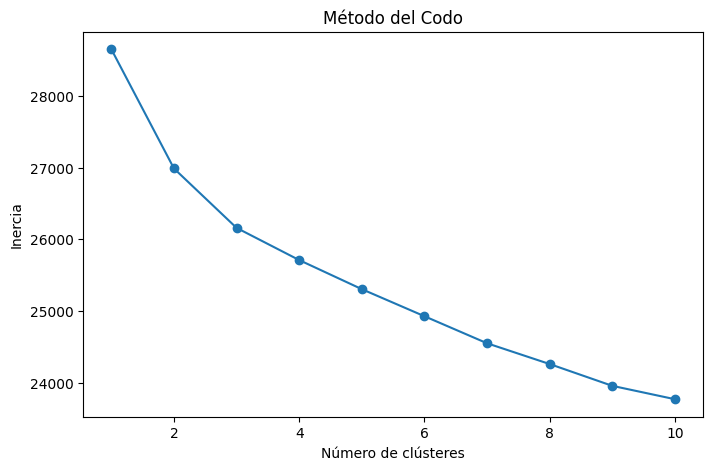

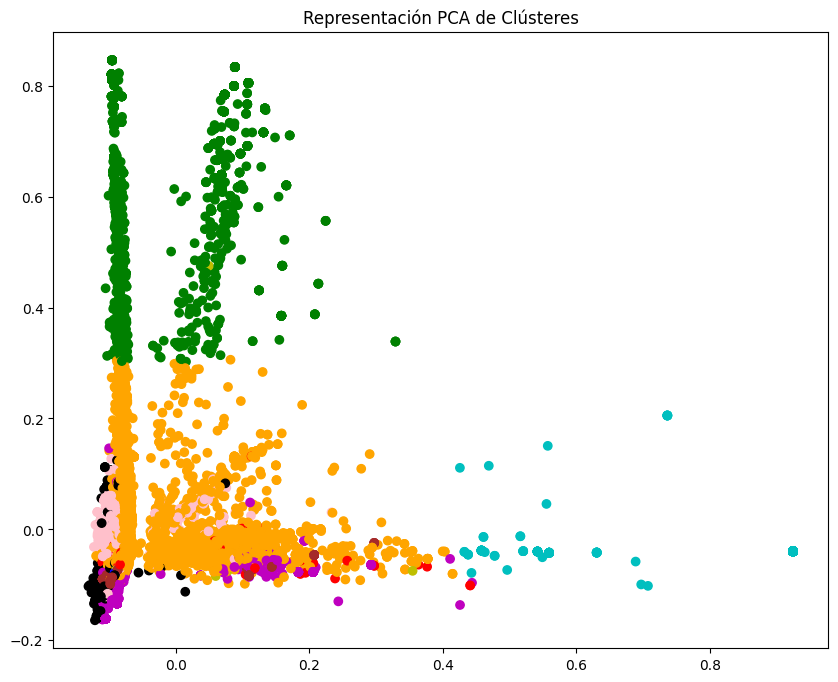

In [ ]:
import pandas as pd
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from nltk.corpus import stopwords

# Descargar stopwords de NLTK si no lo has hecho aún
nltk.download('stopwords')
stop_words = stopwords.words('spanish')

# Cargar el dataset
df = pd.read_csv('SIT_SMALL2.csv', delimiter=";")

# Preprocesamiento del texto
def preprocess_text(text):
    if isinstance(text, float):  # Manejar valores NaN o no textuales
        return ""
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar caracteres especiales
    text = re.sub(r'\W', ' ', text)
    # Eliminar números
    text = re.sub(r'\d', '', text)
    # Eliminar espacios extra
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['processed_text'] = df['TEXTO_SOLICITUD_PREL'].apply(preprocess_text)

# Vectorización TF-IDF
vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(df['processed_text'])

# Método del codo para determinar el número óptimo de clústeres
def plot_elbow_method(X):
    sse = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
        sse.append(kmeans.inertia_)
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 11), sse, marker='o')
    plt.title('Método del Codo')
    plt.xlabel('Número de clústeres')
    plt.ylabel('Inercia')
    plt.show()

plot_elbow_method(X)

# Aplicar K-Means con el número óptimo de clústeres (suponiendo k óptimo = 5)
kmeans = KMeans(n_clusters=10, random_state=0)
df['cluster'] = kmeans.fit_predict(X)

# Opcional: Reducir dimensionalidad para visualización con PCA
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(X.toarray())

colors = ['r', 'b', 'c', 'y', 'm', 'g', 'k', 'orange', 'pink', 'brown']

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]
plt.figure(figsize=(10, 8))
plt.scatter(x_axis, y_axis, c=[colors[d] for d in df['cluster']])
plt.title("Representación PCA de Clústeres")
plt.show()

# Guardar resultados
df.to_csv('resultados_clustering.csv', sep=";")


In [ ]:
df = pd.read_csv('SIT_SMALL2.csv', delimiter=";")
df.head()

,ID_PREL,ID_PERS,NUM_PREL,TEXTO_SOLICITUD_PREL,COD_ESPE,FECHA_ALTA_PREL,COD_TRPE,DESCR_TRPE,FORMA_ENTRADA_PREL
0,386,274516,2014/00000025,Solicito adhesión al plan personalizado de pag...,FI,2014-11-13 22:51:41.000,PPP,Solicitud/Consulta de plan personalizado de pago,OVT
1,230,58932,2014/00000015,"QUE DADA LA SITUACIÓN ACTUAL DE LA EMPRESA, SE...",FI,2014-06-17 12:44:17.000,FR,Solicitud de fraccionamiento - aplazamiento de...,OVT
2,389,95206,2014/00000026,SOLICITUD APLAZAMIENTO VARIAS DEUDAS I.B.I.,FI,2014-11-19 18:25:26.000,FR,Solicitud de fraccionamiento - aplazamiento de...,OVT
3,392,101181249,2014/00000028,Ante la imposibilidad de pagar todos los exped...,FI,2014-11-25 11:03:58.000,FR,Solicitud de fraccionamiento - aplazamiento de...,OVT
4,395,101181249,2014/00000029,SOLICITAMOS UNIRNOS AL PLAN PERSONALIZADO DE P...,FI,2014-11-25 11:30:59.000,PPP,Solicitud/Consulta de plan personalizado de pago,OVT
